# Netflix Recommendation System

By: Hijir Della Wirasti

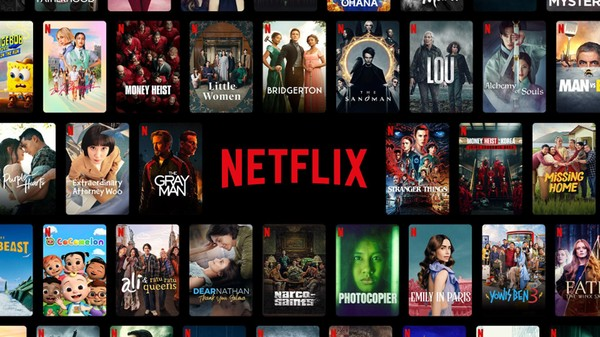

Dataset ini menyediakan data terkait film dan acara TV di Netflix. Kolom-kolom yang tersedia adalah sebagai berikut:

- **show_id**: ID unik untuk setiap film atau acara TV.
- **type**: Jenis konten (Movie atau TV Show).
- **title**: Judul film atau acara TV.
- **director**: Sutradara dari film atau acara TV.
- **cast**: Daftar aktor yang berpartisipasi.
- **country**: Negara asal konten.
- **release_year**: Tahun rilis konten.
- **rating**: Klasifikasi usia untuk konten (misalnya PG-13, TV-MA).
- **listed_in**: Genre atau kategori konten.
- **description**: Deskripsi singkat tentang konten.
- **bag_of_words**: Representasi teks dari fitur penting dalam bentuk gabungan.

# Import Library

In [79]:
!pip install seaborn


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import *
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.colors
from PIL import Image
from collections import Counter
import plotly.express as px
import warnings
import missingno
from collections import Counter
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import matplotlib.colors as mcolors
import time
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTyJb5pY6skPhl8Ypzhf2RRtVpT2gywKvclb5cMAdIPK7XDmmE28pWWzCxBQ-duDT11KjSGj1SUkUWH/pub?output=csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [84]:
df.shape

(8809, 12)

Dataset ini terdiri dari 8809 baris dan 12 kolom dalam DataFrame kita. Jumlah ini mencakup data terkait film dan acara TV di Netflix, mencakup informasi seperti jenis konten, sutradara, pemain, negara asal, tahun rilis, klasifikasi usia, genre, deskripsi, dan lainnya.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


### Finding the null values :

In [86]:
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        column_name = df.isnull().sum().index[i]
        missing_count = df.isnull().sum()[i]
        total_count = len(df)
        missing_percentage = (missing_count / total_count) * 100
        print(f'Total missing values in {column_name}: {missing_count} ({missing_percentage:.2f}%)')


Total missing values in director: 2634 (29.90%)
Total missing values in cast: 825 (9.37%)
Total missing values in country: 831 (9.43%)
Total missing values in date_added: 10 (0.11%)
Total missing values in rating: 4 (0.05%)
Total missing values in duration: 3 (0.03%)


#### Vizualize the Missing Values in Columns

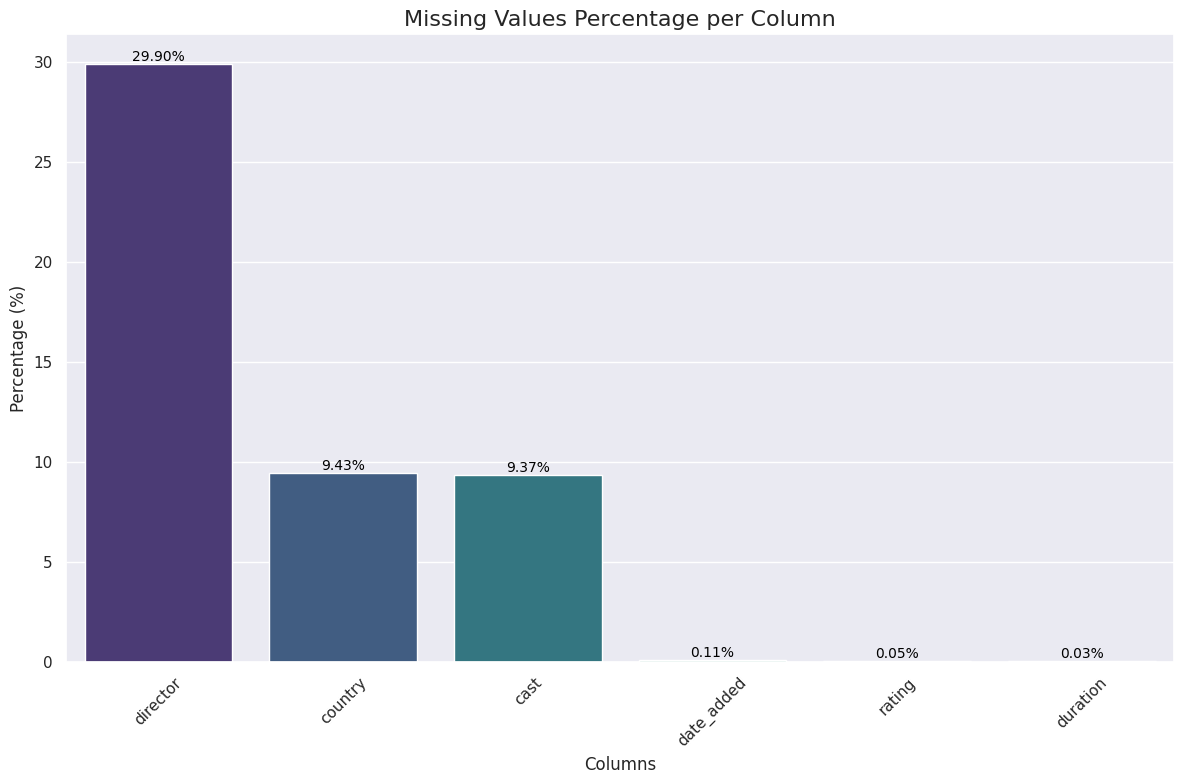

In [87]:
# Calculate missing values percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Plot the missing values
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Missing Values Percentage per Column', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Handling missing values
Kolom **director**, **cast**, **country**, **date_added**, **rating**, dan **duration** mengandung nilai kosong. Kita dapat mengisi nilai kosong tersebut dengan **UnKnown**. Untuk kolom **rating**, kita bisa melakukan pencarian untuk menemukan nilai yang benar. Selain itu, kolom **duration** dan **date_added** tidak diperlukan sehingga dapat dihapus.

In [88]:
df.drop(['duration','date_added'], axis=1 ,inplace=True)

In [89]:
df['director'] = df['director'].fillna('UnKnown')
df['country'] = df['country'].fillna('UnKnown')
df['cast'] = df['cast'].fillna('UnKnown')


### Replace the Corresponding Ratings in the 'rating' Column

In [90]:
rating_replacements = {5989: 'TV-PG', 6827: 'TV-14', 7312: 'PG', 7537: 'PG-13'}
for index, rating in rating_replacements.items():
    df.loc[index, 'rating'] = rating

df['rating'].isnull().any()

False

File input mengandung data **rating** yang tidak benar untuk beberapa judul; oleh karena itu, penting untuk memperbaikinya dengan melakukan **cross-check** atau pengecekan ulang rating secara online. Langkah ini memastikan bahwa data yang digunakan untuk analisis atau rekomendasi memiliki kualitas yang lebih baik dan akurat.

In [91]:
df['rating'] = df['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

In [92]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
release_year,0
rating,0
listed_in,0
description,0


Semua nilai yang hilang dalam dataset telah dihapus atau diisi. Saat ini, tidak ada nilai kosong yang tersisa dalam dataset. Dataset siap digunakan untuk analisis atau pemodelan lebih lanjut.

In [93]:
df.duplicated().sum()

0

Dataset tidak memiliki nilai duplikat. Oleh karena itu, data sudah bersih dari entri yang berulang dan siap digunakan untuk analisis atau pemrosesan lebih lanjut.

### Renaming the 'rating' Column's Values for Easy Understanding:


In [94]:
df['rating'] = df['rating'].replace({
                                            'TV-MA': 'Adults',
                                            'R': 'Adults',
                                            'TV-Y': 'Kids',
                                            'TV-G': 'Kids',
                                            'G': 'Kids',
                                            'PG-13': 'Teens - Age above 12',
                                            'PG': 'Kids - with parental guidence',
                                            'TV-PG': 'Kids - with parental guidence',
                                            'TV-14': 'Teens - Age above 14',
                                            'TV-Y7': 'Kids - Age above 7',
                                            'NC-17': 'Adults',
                                            'UR' : 'Unrated',
                                            'NR': 'Not Rated',
                                            'A': 'Adults'
                                          })

df['rating'].unique()

array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', 'Not Rated',
       'Unrated'], dtype=object)

In [95]:
# Simpan file ke Google Drive
file_path = '/content/netflix_updated.csv'
df.to_csv(file_path, index=False)

print(f"File saved to: {file_path}")

File saved to: /content/netflix_updated.csv


Jumlah **Movie** dan **TV Show** dalam DataFrame.

In [96]:
df_type = df.groupby('type')['show_id'].count().reset_index()
df_type = df_type.rename(columns = {"show_id":"count_showids"})
df_type

,type,count_showids
0,Movie,6132
1,TV Show,2677


## Bag Of Words

Kita akan menghadapi kesulitan saat menangani atribut **director**, **cast**, dan **listed_in** karena data dalam kolom-kolom ini berupa daftar nilai yang dipisahkan oleh koma untuk semua sutradara, aktor, dan genre dari film atau acara TV. Untuk mengatasi masalah ini, kita akan menerapkan pendekatan **bag-of-words** pada kolom-kolom tersebut.

Langkah-langkah yang akan dilakukan:
1. Kita hanya akan menyimpan tiga nilai pertama di setiap kolom dan membuang nilai lainnya.
2. Selanjutnya, kita akan membuat **bag of words** untuk setiap record dengan mengekstrak kata-kata dari atribut-atribut ini.
3. Setelah itu, kita dapat menghitung kesamaan antara bag of words menggunakan **cosine similarity**.

In [97]:
df_new = df.copy()

bag_of_words_data = ['director', 'cast', 'listed_in','description']

for col in bag_of_words_data:
    df_new[col] = df_new[col].astype(str).map(lambda x : x.lower().replace(' ', '').split(',')[:3])

df_new['bag_of_words'] = ''

for i, row in df_new.iterrows():
    words = [' '.join(row[col]) for col in bag_of_words_data]
    df_new.loc[i, 'bag_of_words'] = ' '.join(words)

df_new.head()

,show_id,type,title,director,cast,country,release_year,rating,listed_in,description,bag_of_words
0,s1,Movie,Dick Johnson Is Dead,[kirstenjohnson],[unknown],United States,2020,Teens - Age above 12,[documentaries],"[asherfathernearstheendofhislife, filmmakerkir...",kirstenjohnson unknown documentaries asherfath...
1,s2,TV Show,Blood & Water,[unknown],"[amaqamata, khosingema, gailmabalane]",South Africa,2021,Adults,"[internationaltvshows, tvdramas, tvmysteries]","[aftercrossingpathsataparty, acapetownteensets...",unknown amaqamata khosingema gailmabalane inte...
2,s3,TV Show,Ganglands,[julienleclercq],"[samibouajila, tracygotoas, samueljouy]",UnKnown,2021,Adults,"[crimetvshows, internationaltvshows, tvaction&...","[toprotecthisfamilyfromapowerfuldruglord, skil...",julienleclercq samibouajila tracygotoas samuel...
3,s4,TV Show,Jailbirds New Orleans,[unknown],[unknown],UnKnown,2021,Adults,"[docuseries, realitytv]","[feuds, flirtationsandtoilettalkgodownamongthe...",unknown unknown docuseries realitytv feuds fli...
4,s5,TV Show,Kota Factory,[unknown],"[mayurmore, jitendrakumar, ranjanraj]",India,2021,Adults,"[internationaltvshows, romantictvshows, tvcome...",[inacityofcoachingcentersknowntotrainindia’sfi...,unknown mayurmore jitendrakumar ranjanraj inte...


**CountVectorizer** akan digunakan untuk mengonversi kumpulan dokumen teks menjadi matriks hitungan kata.

In [98]:
vectorizer = CountVectorizer(max_df=0.4,
                             min_df=1,
                             stop_words='english',
                             lowercase=True,
                             ngram_range=(1,3)
                            )

count_matrix = vectorizer.fit_transform(df_new['bag_of_words'])

* Parameter **<b>"max_df"</b>** diatur ke **0.4**, yang berarti kata-kata yang muncul di lebih dari 40% dokumen akan diabaikan.
* Parameter **<b>"min_df"</b>** diatur ke **1**, yang berarti hanya kata-kata yang muncul setidaknya sekali yang akan dimasukkan.
* Parameter **<b>"stop_words"</b>** diatur ke `'english'`, yang berarti kata-kata umum dalam bahasa Inggris seperti "the", "a", dan "an" akan dihapus.
* Parameter **<b>"lowercase"</b>** diatur ke **True**, yang berarti semua teks akan diubah menjadi huruf kecil.
* Parameter **<b>"ngram_range"</b>** menunjukkan rentang **n-grams**, yaitu urutan kata-kata yang berurutan sebanyak **n** dari teks tertentu.

# Data Visualization

## Number of Movies vs TV Shows

Dataset ini memiliki dua nilai dalam kolom **"type"**: **"Movie"** dan **"TV Show"**.

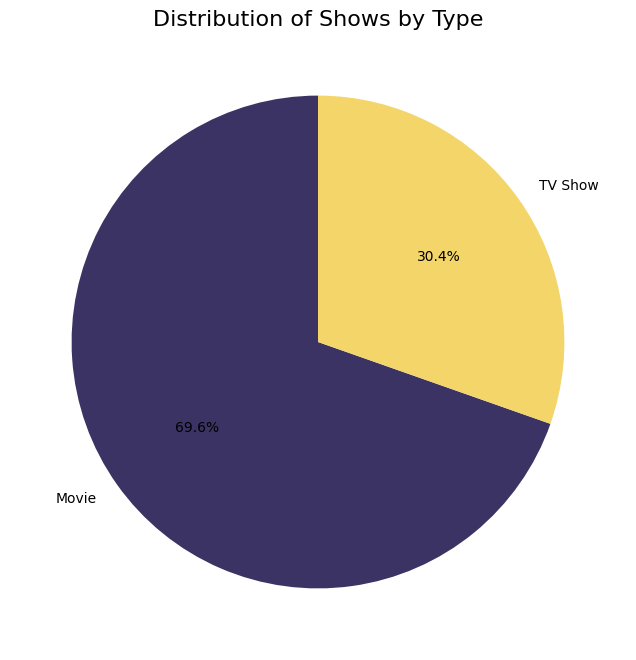

In [19]:
# Create a pie chart for the type distribution
plt.figure(figsize=(8, 8))
plt.pie(
    df_type['count_showids'],
    labels=df_type['type'],
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=90,      # Start the pie chart at 90 degrees
    colors=['#3A3363', '#F3D569']  # Custom colors
)

# Add title
plt.title('Distribution of Shows by Type', fontsize=16)
plt.show()


Dapat dilihat bahwa kategori **"Movie"** mencakup **69.6%** dari total konten, sementara kategori **"TV Show"** mencakup **30.4%**. Hal ini menunjukkan bahwa Netflix memiliki lebih banyak film dibandingkan acara TV. Sebagian besar konten di Netflix terdiri dari film, sedangkan acara TV hanya merupakan bagian kecil dari keseluruhan konten, seperti yang ditunjukkan pada diagram lingkaran. </div>

## Age Rating

In [20]:
# Calculate the distribution of movies and TV shows by age rating
rating_distribution = df.groupby(['type', 'rating'])['show_id'].count().reset_index()
rating_distribution = rating_distribution.rename(columns={'show_id': 'count'})

# Create the stacked bar chart using Plotly
fig = px.bar(
    rating_distribution,
    x='rating',
    y='count',
    color='type',
    title='Distribution of Movies and TV Shows by Age Rating',
    barmode='stack',
    labels={'rating': 'Age Rating', 'count': 'Number of Shows', 'type': 'Type'},
    color_discrete_sequence=['#3A3363', '#F3D569'],  # Custom colors
    text='count'  # Add text labels to the bars
)

# Update layout and text position
fig.update_traces(textposition='inside')  # Place labels inside the bars
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Age Rating',
    yaxis_title='Number of Shows',
    xaxis_tickangle=45  # Rotate x-axis labels for readability
)

fig.show()


Sebagian besar orang dari semua rentang usia lebih memilih untuk menonton Movie dibandingkan dengan TV Show.

## Top Countries with the Highest Number of Content

In [21]:
# Group by country and count the number of shows
country_counts = df.groupby('country')['show_id'].count().reset_index()
country_counts = country_counts.rename(columns={'show_id': 'count'})

# Sort by count in descending order and take the top 10
top_countries = country_counts.sort_values('count', ascending=False).head(10)

# Create the bar chart using Plotly
fig = px.bar(
    top_countries,
    x='country',
    y='count',
    title='Top 10 Countries with the Highest Number of Content',
    labels={'country': 'Country', 'count': 'Number of Shows'},
    color='country',  # Use country for color
    text='count'  # Add text labels to the bars
)

# Update layout for better visibility of labels
fig.update_traces(textposition='outside')
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Country',
    yaxis_title='Number of Shows',
    xaxis_tickangle=45  # Rotate x-axis labels for readability
)

fig.show()


**Amerika Serikat** memproduksi sekitar **2819 konten**, yang merupakan jumlah yang jauh lebih besar dibandingkan dengan konten film yang diproduksi oleh negara lain.

## Top Movies' Directors from United States

In [101]:
# Group the DataFrame by director and country, then count the number of movies
director_counts = df[(df['country'] == 'United States') & (df['director'] != 'UnKnown')].groupby('director')['show_id'].count().reset_index()

# Rename the 'show_id' column to 'movie_count'
director_counts = director_counts.rename(columns={'show_id': 'movie_count'})

# Sort the directors by movie count in descending order
top_directors = director_counts.sort_values('movie_count', ascending=False).head(10)

# Create the bar chart using Plotly Express
fig = px.bar(
    top_directors,
    x='director',
    y='movie_count',
    title="Top 10 Directors from the United States with the Highest Number of Movies",
    labels={'director': 'Director', 'movie_count': 'Number of Movies'},
    color='movie_count',
    text='movie_count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Director',
    yaxis_title='Number of Movies',
    xaxis_tickangle=45
)

fig.show()


## Top Movies' Directors from Indonesia

In [103]:
# Group the DataFrame by director and country, then count the number of movies
director_counts = df[(df['country'] == 'Indonesia') & (df['director'] != 'UnKnown')].groupby('director')['show_id'].count().reset_index()

# Rename the 'show_id' column to 'movie_count'
director_counts = director_counts.rename(columns={'show_id': 'movie_count'})

# Sort the directors by movie count in descending order
top_directors = director_counts.sort_values('movie_count', ascending=False).head(10)

# Create the bar chart using Plotly Express
fig = px.bar(
    top_directors,
    x='director',
    y='movie_count',
    title="Top 10 Directors from Indonesia with the Highest Number of Movies",
    labels={'director': 'Director', 'movie_count': 'Number of Movies'},
    color='movie_count',
    text='movie_count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Director',
    yaxis_title='Number of Movies',
    xaxis_tickangle=45
)

fig.show()


## Top Movie Director in All Country

In [99]:
# Group the DataFrame by director and country, then count the number of movies
director_counts = df[df['director'] != 'UnKnown'].groupby(['country', 'director'])['show_id'].count().reset_index()

# Rename the 'show_id' column to 'movie_count'
director_counts = director_counts.rename(columns={'show_id': 'movie_count'})

# Sort the directors by movie count in descending order
top_directors = director_counts.sort_values('movie_count', ascending=False).head(10)

# Create the bar chart using Plotly Express
fig = px.bar(
    top_directors,
    x='director',
    y='movie_count',
    color='country',
    title="Top 10 Directors with the Highest Number of Movies",
    labels={'director': 'Director', 'movie_count': 'Number of Movies', 'country': 'Country'},
    text='movie_count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Director',
    yaxis_title='Number of Movies',
    xaxis_tickangle=45
)

fig.show()


## Top Movies' Actor from All Country

In [121]:
# Filter out rows where 'cast' or 'country' is 'UnKnown' and group by 'country' and 'cast', then count the number of movies
actor_counts = df[(df['cast'] != 'UnKnown') & (df['country'] != 'UnKnown') & (df['cast'].notna()) & (df['country'].notna())] \
    .groupby(['country', 'cast'])['show_id'].count().reset_index()

# Rename the 'show_id' column to 'movie_count'
actor_counts = actor_counts.rename(columns={'show_id': 'movie_count'})

# Sort the actors by movie count in descending order
top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)

# Create the horizontal bar chart using Plotly Express
fig = px.bar(
    top_actors,
    x='movie_count',
    y='cast',
    color='country',
    title="Top Actors with the Highest Number of Movies in All Country",
    labels={'cast': 'Actor', 'movie_count': 'Number of Movies', 'country': 'Country'},
    text='movie_count',
    orientation='h'  # Set orientation to horizontal
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Number of Movies',
    yaxis_title='Actor',
    yaxis={'categoryorder': 'total ascending'},  # Order actors by movie count
    height=600  # Adjust height for better visualization
)

fig.show()


## Top Movies' Actors from U.K.

In [23]:
# Group the DataFrame by cast and country, then count the number of movies
actor_counts = df[(df['country'] == 'United Kingdom') & (df['cast'] != 'UnKnown')].groupby('cast')['show_id'].count().reset_index()

# Rename the 'show_id' column to 'movie_count'
actor_counts = actor_counts.rename(columns={'show_id': 'movie_count'})

# Sort the actors by movie count in descending order
top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)

# Create the bar chart using Plotly Express
fig = px.bar(
    top_actors,
    x='cast',
    y='movie_count',
    title="Top 10 Actors from the U.K. with the Highest Number of Movies",
    labels={'cast': 'Actor', 'movie_count': 'Number of Movies'},
    color='movie_count',
    text='movie_count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Actor',
    yaxis_title='Number of Movies',
    xaxis_tickangle=45
)

fig.show()

**David Attenborough** juga merupakan aktor dengan jumlah film terbanyak. Setelah itu, ada empat aktor lainnya, yaitu **John Cleese**, **Eric Idle**, **Terry Gilliam**, dan **Terry Jones**.

In [106]:
# Group the DataFrame by cast and country, then count the number of movies
actor_counts = df[(df['country'] == 'United States') & (df['cast'] != 'UnKnown')].groupby('cast')['show_id'].count().reset_index()

# Rename the 'show_id' column to 'movie_count'
actor_counts = actor_counts.rename(columns={'show_id': 'movie_count'})

# Sort the actors by movie count in descending order
top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)

# Create the bar chart using Plotly Express
fig = px.bar(
    top_actors,
    x='cast',
    y='movie_count',
    title="Top 10 Actors from the U.S. with the Highest Number of Movies",
    labels={'cast': 'Actor', 'movie_count': 'Number of Movies'},
    color='movie_count',
    text='movie_count'
)

fig.update_traces(textposition='outside')
fig.update_layout(
    title={'x': 0.5},  # Center the title
    xaxis_title='Actor',
    yaxis_title='Number of Movies',
    xaxis_tickangle=45
)

fig.show()

## Top Movies Actor from Indonesia

In [115]:
# Group the DataFrame by cast and country, then count the number of movies
actor_counts = df[(df['country'] == 'Indonesia') & (df['cast'] != 'UnKnown')].groupby('cast')['show_id'].count().reset_index()

# Rename the 'show_id' column to 'movie_count'
actor_counts = actor_counts.rename(columns={'show_id': 'movie_count'})

# Sort the actors by movie count in descending order
top_actors = actor_counts.sort_values('movie_count', ascending=False).head(10)

# Create the horizontal bar chart using Plotly Express
fig = px.bar(
    top_actors,
    x='movie_count',
    y='cast',
    title="Top Actors from Indonesia with the Highest Number of Movies",
    labels={'cast': 'Actor', 'movie_count': 'Number of Movies'},
    color='movie_count',
    text='movie_count',
    orientation='h'  # Set orientation to horizontal
)

fig.update_traces(textposition='outside', textfont_size=10)  # Adjust text size
fig.update_layout(
    title={'x': 0.5, 'font': {'size': 18}},  # Center the title and adjust size
    xaxis_title='Number of Movies',
    yaxis_title='Actor',
    yaxis={
        'categoryorder': 'total ascending',  # Order actors by movie count
        'titlefont_size': 12,  # Adjust y-axis title font size
        'tickfont_size': 10   # Adjust y-axis tick font size
    },
    xaxis={
        'titlefont_size': 12,  # Adjust x-axis title font size
        'tickfont_size': 10    # Adjust x-axis tick font size
    },
    height=600  # Adjust height for better visualization
)

fig.show()


## Genre Correlation

Kolom genre diolah menjadi daftar menggunakan pemisah koma, lalu diubah menjadi matriks biner menggunakan MultiLabelBinarizer, di mana setiap baris mewakili film/acara TV dan setiap kolom menunjukkan genre. Matriks korelasi antar-genre dihitung untuk menunjukkan hubungan positif, negatif, atau nol antar-genre. Hasilnya divisualisasikan dalam heatmap menggunakan seaborn, dengan colormap khusus untuk menggambarkan kekuatan dan arah korelasi antar-genre.

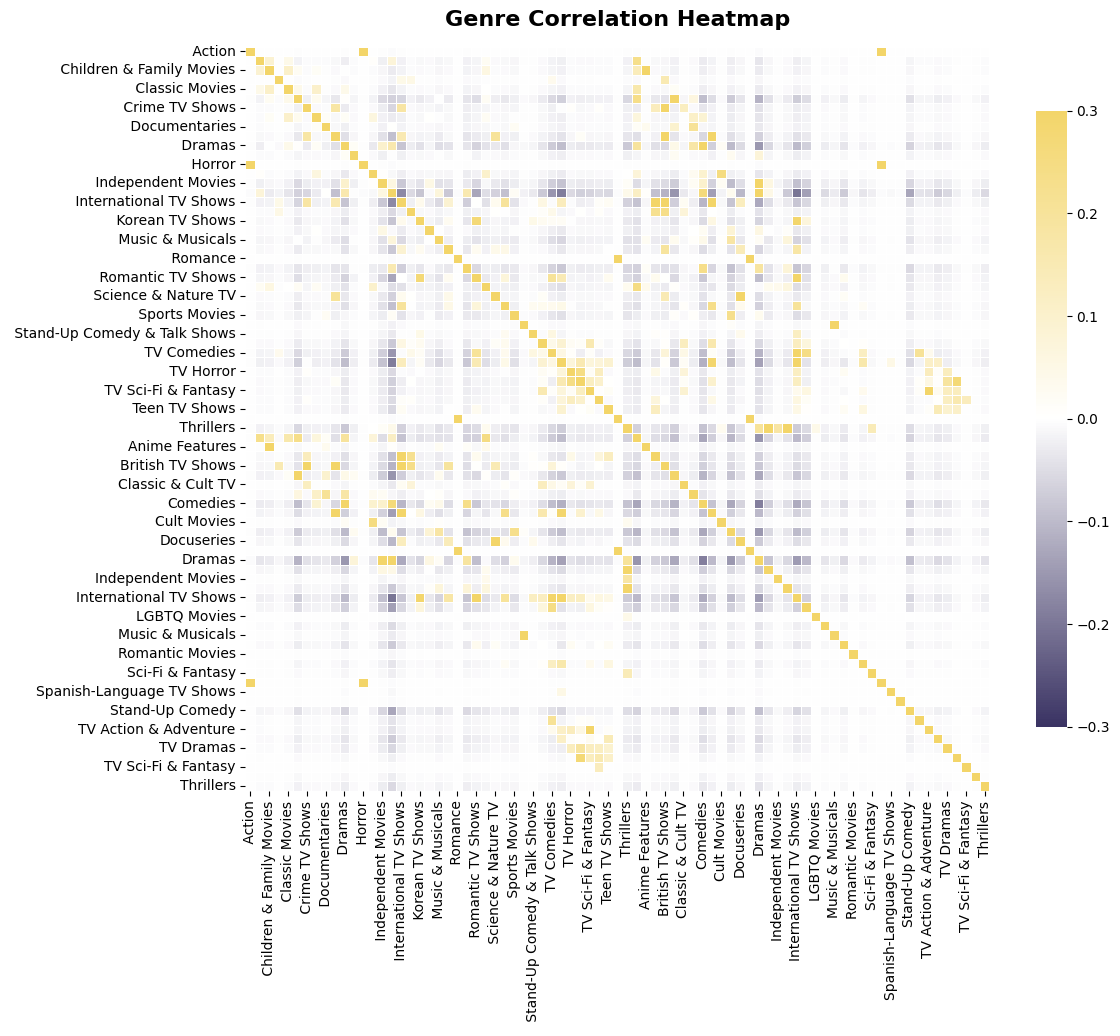

In [24]:
# Define the colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#3A3363", "#FFFFFF", "#F3D569"])

def genre_heatmap(df):
    # Process the 'listed_in' column
    df['genre'] = df['listed_in'].apply(lambda x: x.split(','))

    # Create binary matrix for genres
    mlb = MultiLabelBinarizer()
    binary_matrix = mlb.fit_transform(df['genre'])

    # Calculate correlation
    genre_df = pd.DataFrame(binary_matrix, columns=mlb.classes_)
    genre_corr = genre_df.corr()

    # Plot the heatmap with square style
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        genre_corr,
        cmap=cmap,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        vmin=-0.3,
        vmax=0.3
    )
    plt.title('Genre Correlation Heatmap', fontsize=16, fontweight='bold', pad=15)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Call the function with the dataframe
genre_heatmap(df)


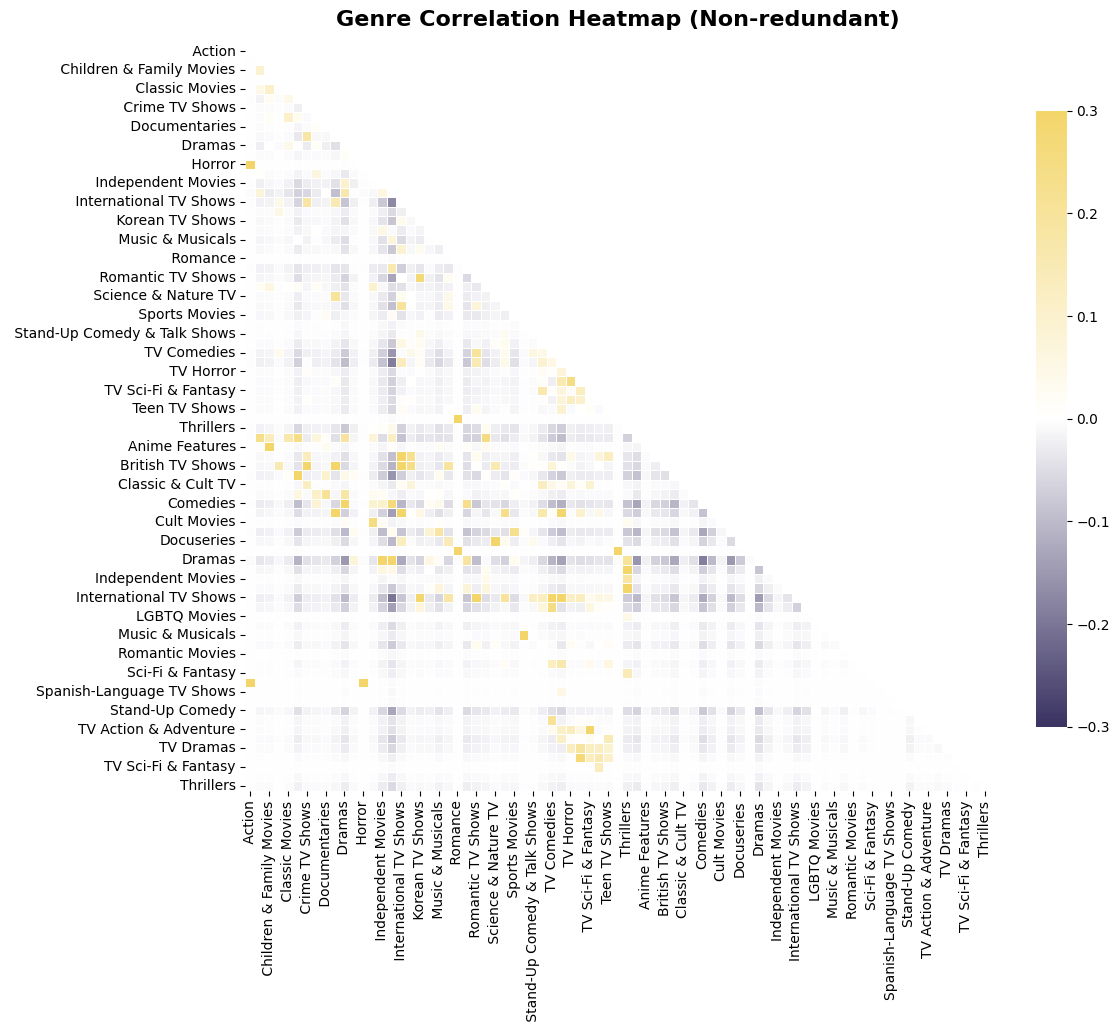

In [25]:
# Define the colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["#3A3363", "#FFFFFF", "#F3D569"])

def genre_heatmap(df):
    # Process the 'listed_in' column
    df['genre'] = df['listed_in'].apply(lambda x: x.split(','))

    # Create binary matrix for genres
    mlb = MultiLabelBinarizer()
    binary_matrix = mlb.fit_transform(df['genre'])

    # Calculate correlation
    genre_df = pd.DataFrame(binary_matrix, columns=mlb.classes_)
    genre_corr = genre_df.corr()

    # Mask the upper triangle of the heatmap
    mask = np.triu(np.ones_like(genre_corr, dtype=bool))

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        genre_corr,
        mask=mask,
        cmap=cmap,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        vmin=-0.3,
        vmax=0.3
    )
    plt.title('Genre Correlation Heatmap (Non-redundant)', fontsize=16, fontweight='bold', pad=15)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

# Call the function with the dataframe
genre_heatmap(df)


# Recommendation System (Content-Based)

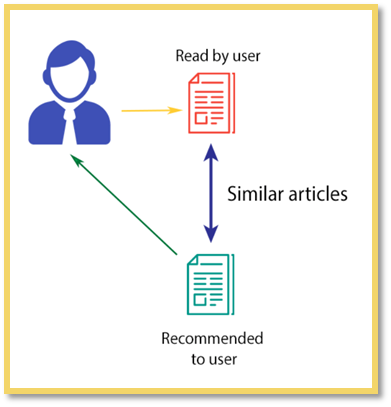

Dalam proyek ini, saya menggunakan **sistem rekomendasi berbasis konten** dengan **metode clustering**. Konten dari film (seperti pemeran, deskripsi, sutradara, genre, dll.) dianalisis untuk menentukan kesamaannya dengan film lainnya. Berdasarkan kesamaan tersebut, film yang paling mirip direkomendasikan.

# **K-Means Clustering**

Tujuan dari algoritma ini adalah mengembangkan sistem rekomendasi yang menggunakan struktur graf dan mengevaluasi kesamaan antar node menggunakan **Adamic Adar measure**. Ukuran ini menunjukkan tingkat kedekatan antara dua node, di mana nilai yang lebih tinggi menunjukkan kesamaan yang lebih besar. Alih-alih menghitung ukuran ini untuk semua film secara keseluruhan, algoritma rekomendasi akan mengeksplorasi lingkungan film target untuk menentukan daftar film yang direkomendasikan.

Pertama, saya mengelompokkan data tekstual menggunakan algoritma **K-means clustering** dan menetapkan setiap data ke dalam cluster tertentu. Jumlah cluster (**k**) diatur ke **200**. Selanjutnya, saya menginisialisasi objek **MiniBatchKMeans** dengan 200 cluster dan menerapkan algoritma **MiniBatchKMeans** pada hasil **CountVectorizer** yang sebelumnya telah digunakan. **MiniBatchKMeans** adalah varian dari algoritma K-means standar yang dioptimalkan untuk dataset berukuran besar.

Kolom **"description"** diubah menjadi representasi **CountVectorizer** menggunakan vectorizer yang sama seperti sebelumnya. Data yang telah diubah ini disimpan dalam variabel **"request_transform"**. Algoritma **MiniBatchKMeans** memprediksi cluster untuk setiap data di **"request_transform"** dan menetapkan nilai cluster yang diprediksi ke kolom baru bernama **"cluster"**. Akhirnya, jumlah data dalam setiap cluster dihitung, dan lima cluster dengan jumlah data terbanyak dikembalikan.

In [23]:
k = 200

kmeans = MiniBatchKMeans(n_clusters = k)

kmeans.fit(count_matrix)

centers = kmeans.cluster_centers_.argsort()[:,::-1]

terms = vectorizer.get_feature_names_out()

request_transform = vectorizer.transform(df_new['bag_of_words'])

df_new['cluster'] = kmeans.predict(request_transform)

df_new['cluster'].value_counts().head()

,count
cluster,
70,2939
77,2101
18,604
43,389
35,272


Kita akan mendefinisikan sebuah fungsi yang menerima sebuah matriks sparse, indeks dari sebuah dokumen, dan jumlah dokumen serupa yang ingin diambil, lalu mengembalikan daftar indeks dokumen yang paling mirip dalam matriks berdasarkan cosine similarity dengan dokumen yang diberikan.

In [24]:
def find_similar(CountVectorizer_matrix, index, top_n = 10):
    cosine_similarities = linear_kernel(CountVectorizer_matrix[index:index+1], CountVectorizer_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

Kemudian kita akan membuat sebuah graf menggunakan pustaka <b>NetworkX</b> dan mengisinya dengan node dan edge berdasarkan data yang ada dalam DataFrame kita. Graf ini merepresentasikan film, aktor, kategori, sutradara, dan negara sebagai **node**, serta hubungan di antara mereka sebagai **edge**.<br>

Kode ini memulai dengan menginisialisasi sebuah graf kosong dengan label "MOVIE". Selanjutnya, kode melakukan iterasi melalui setiap baris data dan menambahkan node ke graf untuk setiap film. Node ini berisi atribut seperti judul film, **show_id**, tipe (Movie atau TV Show), dan rating. Setelah itu, kode membuat node tambahan untuk setiap aktor, kategori, sutradara, dan negara yang terkait dengan film, lalu menambahkan edge untuk menghubungkan node tersebut dengan node film.<br>
Fungsi **find_similar()** digunakan untuk menemukan film yang paling mirip dengan film saat ini berdasarkan **CountVectorizer**, kemudian menambahkan node dan edge untuk merepresentasikan hubungan kesamaan ini. Terakhir, kode mencetak waktu yang diperlukan untuk menyelesaikan proses pembuatan graf.

In [25]:
G = nx.Graph(label="MOVIE")

start_time = time.time()

for i, rowi in df_new.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])

    for element in rowi['cast']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['listed_in']:
        G.add_node(element,label="CATEGORY")
        G.add_edge(rowi['title'], element, label="CATEGORY_IN")
    for element in rowi['director']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['country']:
        G.add_node(element,label="COUNTRY")
        G.add_edge(rowi['title'], element, label="COUNTERY_IN")

    indices = find_similar(count_matrix, i, top_n = 10)
    snode="Sim("+rowi['title'][:15].strip()+")"

    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")

    for element in indices:
        G.add_edge(snode, df_new['title'].loc[element], label="SIMILARITY")

print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.006274700164794922 seconds --
 iter 1000 -- 16.829282760620117 seconds --
 iter 2000 -- 39.45359539985657 seconds --
 iter 3000 -- 61.15908718109131 seconds --
 iter 4000 -- 76.46811056137085 seconds --
 iter 5000 -- 92.24296188354492 seconds --
 iter 6000 -- 107.94549202919006 seconds --
 iter 7000 -- 123.62112140655518 seconds --
 iter 8000 -- 138.8227677345276 seconds --
 finish -- 153.35181498527527 seconds --


Fungsi **`get_all_adj_nodes`** menerima daftar node dalam graf utama sebagai input dan mengembalikan daftar semua node yang berdekatan dengan node-node tersebut, termasuk node asli yang diberikan. Fungsi ini digunakan untuk mengekstrak **subgraf** yang mencakup node dalam daftar input beserta tetangga mereka.<br>

Fungsi **`draw_sub_graph`** menerima daftar node sebagai input dan memvisualisasikan subgraf dari graf utama yang mencakup node-node tersebut. Fungsi ini pertama-tama membuat objek subgraf menggunakan metode **`subgraph`** dari pustaka **NetworkX**, lalu memberikan warna pada setiap node berdasarkan labelnya, dan akhirnya menggambar subgraf menggunakan metode **`draw`** dari pustaka NetworkX. Hasil plot menunjukkan node dan edge dalam subgraf, dengan node diberi warna sesuai labelnya.

In [26]:
def get_all_adj_nodes(list_in):

    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
                sub_graph.add(e)
    return list(sub_graph)

def draw_sub_graph(sub_graph):

    subgraph = G.subgraph(sub_graph)
    colors=[]

    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('darkorange')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('paleturquoise')
        elif G.nodes[e]['label']=="CATEGORY":
            colors.append('springgreen')
        elif G.nodes[e]['label']=="COUNTRY":
            colors.append('gold')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('blue')
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('deeppink')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()

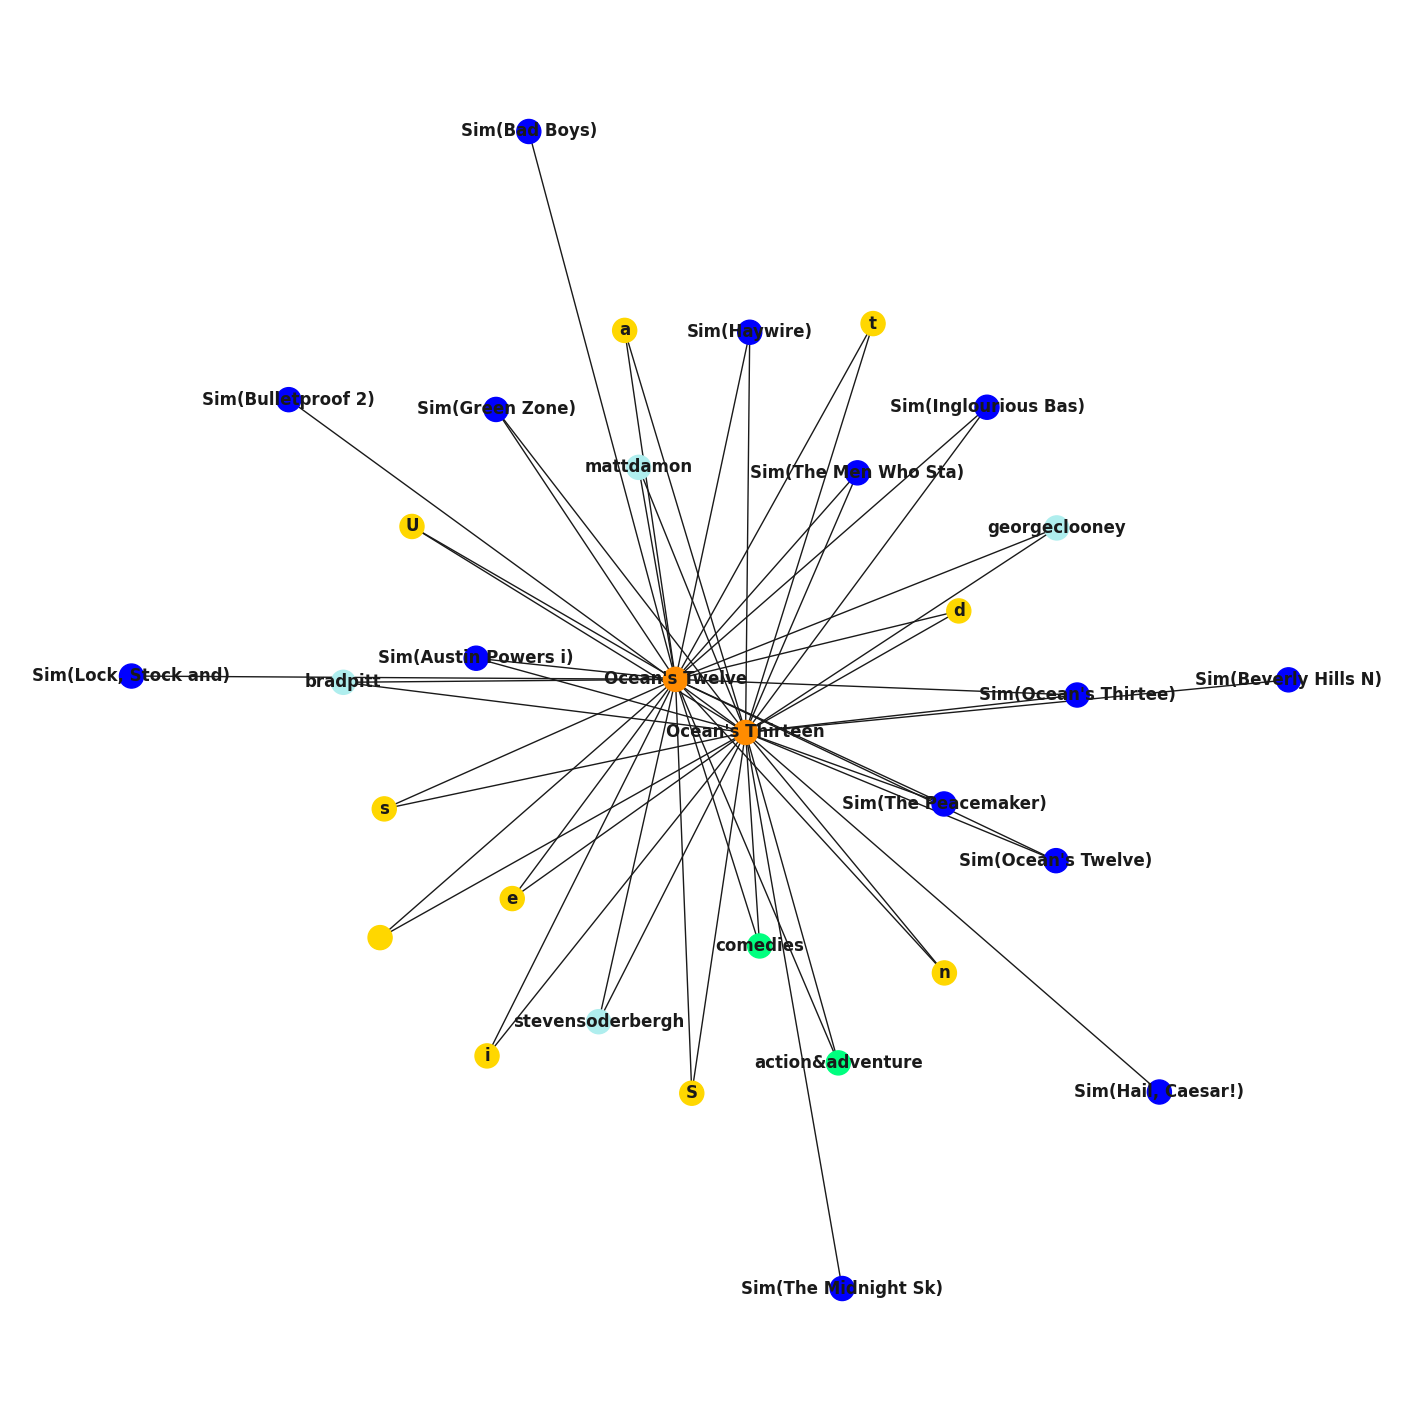

In [27]:
sns.set_theme()

plt.rcParams['figure.figsize'] = [14,14]
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

Fungsi **`get_recommendation`** menerima judul film sebagai input dan mengembalikan daftar film yang direkomendasikan berdasarkan kesamaannya dengan film input. Fungsi ini pertama-tama membuat sebuah dictionary bernama **`commons_neighbours`** yang menyimpan tetangga bersama antara film input dengan film lain dalam graf.

Untuk setiap tetangga dari tetangga yang merupakan sebuah film, sebuah **bobot** dihitung berdasarkan derajat (degree) dari tetangga bersama tersebut. Setelah itu, fungsi mengembalikan **pandas series** yang telah diurutkan, berisi daftar film yang direkomendasikan beserta bobotnya.

Akhirnya, fungsi ini dipanggil empat kali untuk empat film berbeda, dan daftar film yang direkomendasikan teratas dicetak untuk masing-masing film input.

In [28]:
def get_recommendation(root):
    commons_neighbours = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_neighbours.get(e2)
                if commons==None:
                    commons_neighbours.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_neighbours.update({e2 : commons})

    movies=[]
    weight=[]

    for key, values in commons_neighbours.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key)
        weight.append(w)

    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)
    return result;

result = get_recommendation("Ocean's Twelve")
print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)
print(result.head())

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
Ocean's Thirteen             6.672306
The Man Who Feels No Pain    4.489693
Ant-Man and the Wasp         2.695673
Coffee & Kareem              2.695673
The Art of the Steal         2.695673
dtype: float64


In [29]:
result2 = get_recommendation("PK")
print("-"*40+"\n Recommendation for 'pk'\n"+"-"*40)
print(result2.head())

----------------------------------------
 Recommendation for 'pk'
----------------------------------------
3 Idiots                           5.190512
Dil                                3.863241
Dil Chahta Hai                     3.863241
EMI: Liya Hai To Chukana Padega    3.029176
Anthony Kaun Hai?                  2.612143
dtype: float64


In [30]:
result3 = get_recommendation("Stranger Things")
print("-"*40+"\n Recommendation for 'Stranger Things'\n"+"-"*40)
print(result3.head())

----------------------------------------
 Recommendation for 'Stranger Things'
----------------------------------------
Nightflyers       5.714891
Helix             5.297859
The Messengers    5.066243
The 4400          5.066243
Warrior Nun       5.066243
dtype: float64


## Top recommendations

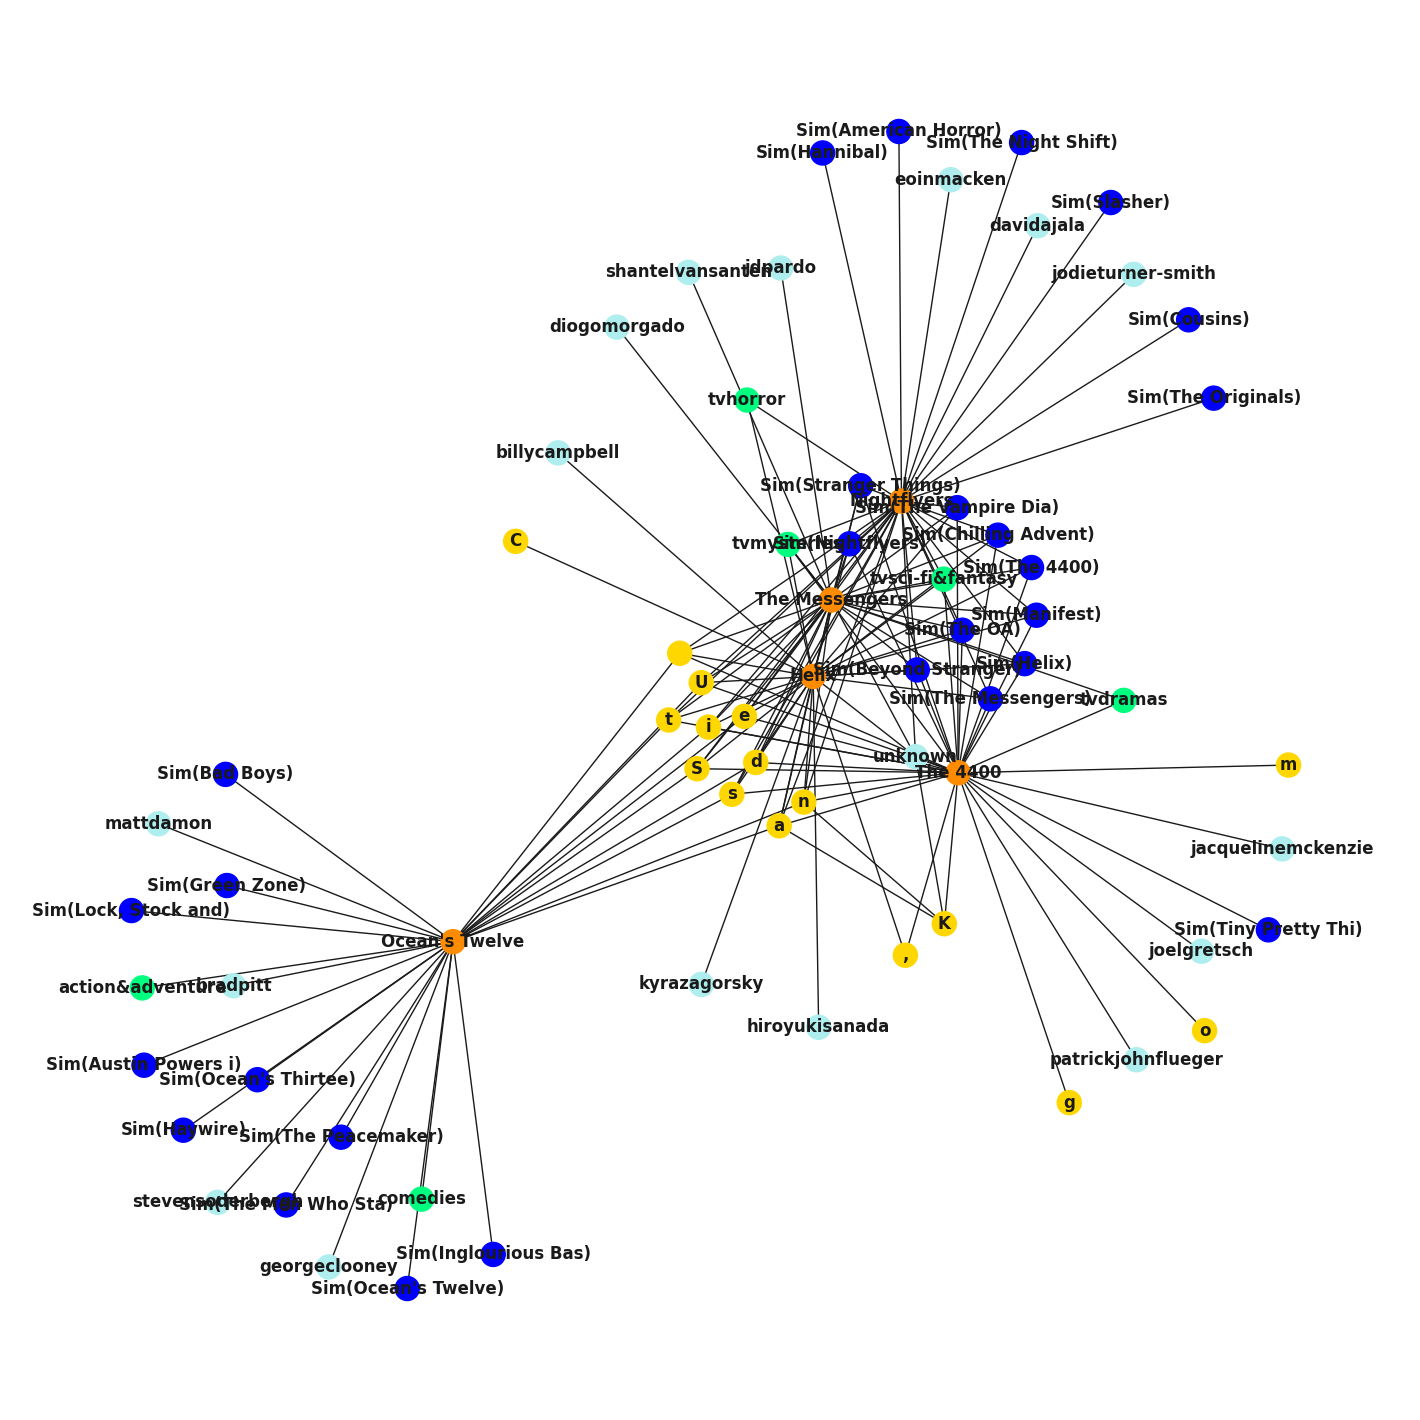

In [31]:
reco=list(result3.index[:4].values)
reco.extend(["Ocean's Twelve"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

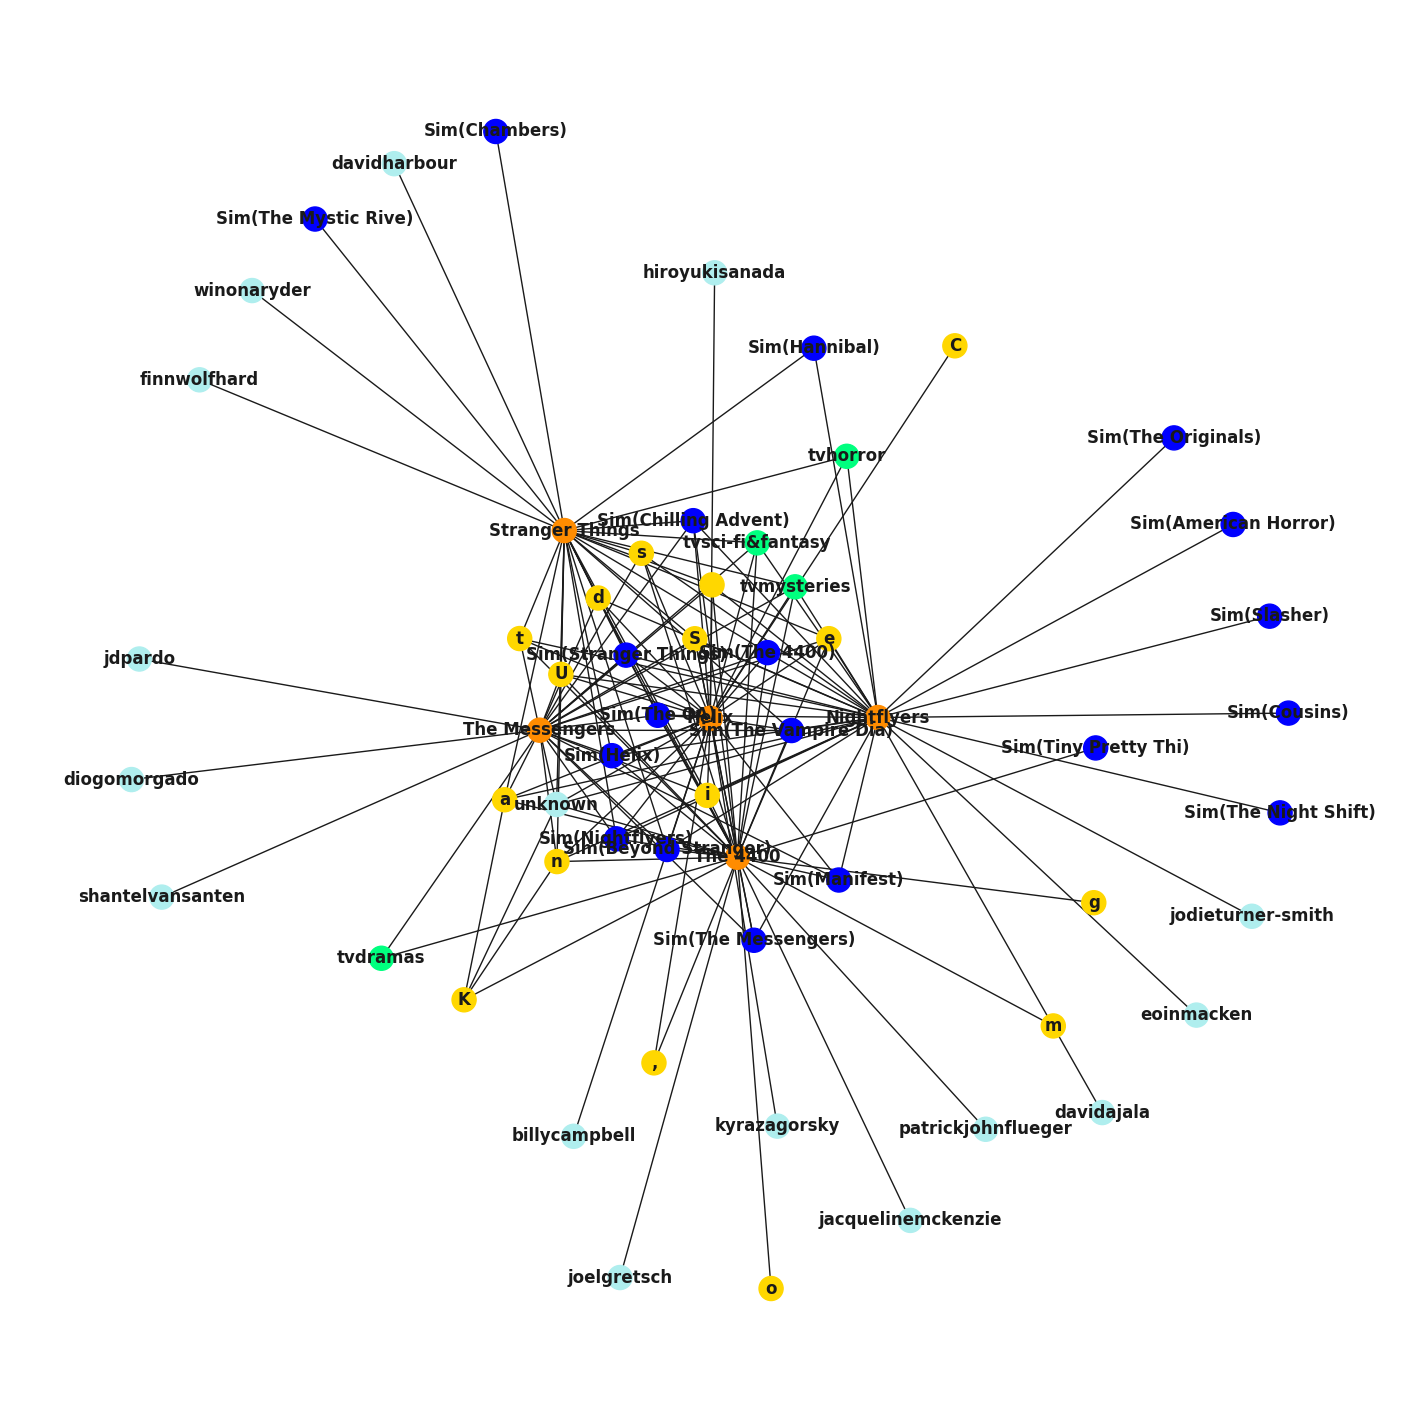

In [32]:
reco=list(result3.index[:4].values)
reco.extend(["Stranger Things"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)

In [33]:
db_index = davies_bouldin_score(count_matrix.toarray(), kmeans.labels_)

print("The Davies-Bouldin index is: {:.3f}".format(db_index))

The Davies-Bouldin index is: 1.451


Kami menghitung **Davies-Bouldin Index**, sebuah metrik untuk validasi klaster, menggunakan matriks hitung yang diperoleh dari representasi **bag-of-words** pada data input serta label yang diperoleh dari hasil clustering menggunakan algoritma **K-means**. Nilai indeks yang dihitung kemudian dicetak sebagai output.

Dalam kasus ini, nilai **Davies-Bouldin Index** adalah **1.459**, yang menunjukkan bahwa hasil clustering cukup baik, dengan jarak antar-poin dalam satu klaster (**intra-cluster distance**) rendah dan jarak antar-klaster (**inter-cluster distance**) tinggi.

# **K Nearest Neighbours (KNN)**

Dalam algoritma ini, tujuan kita adalah membangun sistem rekomendasi dengan menerapkan **algoritma K Nearest Neighbors (KNN)** untuk berfokus pada kolom-kolom yang paling relevan. Untuk mencapainya, kita mengambil kolom-kolom yang dianggap membantu dalam menghasilkan rekomendasi.



In [34]:
features_knn = ['type', 'country','release_year','rating','title']

df_knn = df[features_knn]

Kita akan membuat **dummy variables** dan menggunakan **one-hot encoding** untuk kolom kategorikal seperti **type**, **rating**, dan **country**. Dummy variables adalah cara merepresentasikan variabel kategorikal menjadi variabel biner (0 dan 1) yang dapat digunakan dalam model statistik. Setelah itu, indeks pada DataFrame `my_df_knn` akan direset, dan indeks sebelumnya akan dihapus, sehingga baris-baris dalam DataFrame diatur ulang. Parameter **drop** diatur ke **True** untuk menghapus kolom indeks lama.

In [35]:
df_knn = pd.get_dummies(df_knn, columns=['type', 'rating', 'country'])

df_knn.reset_index(drop=True, inplace=True)

 **CountVectorizer** dari SKLearn dalam algoritma ini untuk membangun matriks jumlah kata (**word count matrix**) dari semua **bag of words** yang ada dalam dataset. Dengan matriks ini, kami dapat membuat matriks **cosine similarity** untuk mengukur kesamaan antar data.

In [36]:
similarities = cosine_similarity(count_matrix, count_matrix)

dissimilarities = 1 - similarities


Kita akan menerapkan fungsi **`euclidean_distance`**, yang menghitung jarak Euclidean antara dua baris, yaitu ukuran perbedaan keseluruhan antara nilai fitur mereka. Nilai fitur untuk setiap baris diambil dari semua kolom dalam dataset kecuali kolom **title**, **bag_of_words**, dan **release_year**. Parameter **`release_year_weighting`** (secara default diatur ke 0.1) digunakan untuk memberikan bobot yang lebih kecil pada perbedaan tahun rilis dibandingkan dengan perbedaan fitur numerik lainnya.

Fungsi **`total_distance`** menghitung total jarak antara dua baris dengan menggabungkan jarak Euclidean di antara mereka dengan ketidaksamaan antara **bag of words** mereka. Parameter **`bag_of_words_weighting`** memungkinkan pengguna untuk menentukan seberapa besar pentingnya ketidaksamaan **bag of words** dibandingkan dengan jarak Euclidean.

In [37]:
def euclidean_distance(record1, record2, release_year_weighting=0.1):
    record1_features = np.array([record1[col] for col in df_knn.columns if col != 'title' and col != 'bag_of_words' and col != 'release_year'])
    record1_features = record1_features.astype(np.int16)
    record2_features = np.array([record2[col] for col in df_knn.columns if col != 'title' and col != 'bag_of_words' and col != 'release_year'])
    record2_features = record2_features.astype(np.int16)
    diffs = np.subtract(record1_features, record2_features)

    diff_release_year = release_year_weighting * (record1['release_year'] - record2['release_year'])
    diffs = np.append(diffs, [diff_release_year])

    return math.sqrt(np.sum([diff ** 2 for diff in diffs]))

In [38]:
def total_distance(record1_index, record2_index, bag_of_words_weighting=2):
    record1 = df_knn.iloc[record1_index]
    record2 = df_knn.iloc[record2_index]
    distance = euclidean_distance(record1, record2)
    distance += bag_of_words_weighting * dissimilarities[record1_index][record2_index]
    return distance

**`dissimilarities`** adalah matriks yang merepresentasikan ketidaksamaan antara pasangan baris dalam DataFrame berdasarkan kolom **`bag_of_words`**. Fungsi **`total_distance`** digunakan untuk menghitung jarak keseluruhan antara dua baris dengan mempertimbangkan baik fitur numerik maupun fitur **bag_of_words**.

Baris kode **`distance += bag_of_words_weighting * dissimilarities[record1_index][record2_index]`** menambahkan nilai ketidaksamaan yang telah diberi bobot dari kolom **bag_of_words** ke variabel jarak (**distance**). Parameter **`bag_of_words_weighting`** digunakan untuk mengontrol bobot yang diberikan pada fitur **bag_of_words** dalam perhitungan jarak keseluruhan. Dengan mengalikan nilai ketidaksamaan dengan parameter ini, fungsi dapat memberikan lebih banyak atau lebih sedikit pentingnya fitur **bag_of_words** dalam perhitungan jarak.

Selain itu, sebuah fungsi **recommend** dibuat untuk menjalankan algoritma **K-Nearest Neighbours (KNN)** pada judul Netflix tertentu dan memberikan hasil rekomendasi, dengan nilai default untuk **k** adalah 5.

In [39]:
def get_recommendation_knn(title, top=5):
    all_titles = df_knn['title']
    title_instances = all_titles[all_titles == title]

    if title_instances.empty:
        print("Sorry! There isn't that movie in our databese")
        return

    curr_index = all_titles[all_titles == title].index[0]

    distances = list()

    for i, row in df_knn.iterrows():
        distances.append((row, total_distance(curr_index, i)))

    distances.sort(key=lambda tup: tup[1])
    results = list(map(lambda tup: tup[0]['title'], distances[1:top+1]))

    for res in results:
        print(res)
    print()


In [40]:
print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)
result = get_recommendation_knn("Ocean's Twelve")
print(result)

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
Ocean's Thirteen
Starsky & Hutch
Charlie's Angels: Full Throttle
The Dukes of Hazzard
Men in Black II

None


In [41]:
print("-"*40+"\n Recommendation for 'PK'\n"+"-"*40)
result1 = get_recommendation_knn("PK")
print(result1)

----------------------------------------
 Recommendation for 'PK'
----------------------------------------
One by Two
Chal Bhaag
Jatt James Bond
Dedh Ishqiya
Ungli

None


In [42]:
def find_movie(movie_name):
    test = []

    for i in range(len(df)):
        if df.iloc[i][2] == movie_name:
            test = df.iloc[i]
    return test

In [43]:
def Find_Difference(Original,recommended) :
    orgin_movie = find_movie(Original)
    first_pred = find_movie(recommended)
    print("=====================================================================================")
    listed_in_orgin_movie = orgin_movie[8]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[8]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[7]
    print("Rating for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[7]
    print("Rating for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[5]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[5]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[6]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[6]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[1]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[1]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")

    listed_in_orgin_movie = orgin_movie[3]
    print("Genre for the original movie : ",listed_in_orgin_movie)

    listed_in_first_pred = first_pred[3]
    print("Genre for the recommended movie : ",listed_in_first_pred)
    print("=====================================================================================")


Fungsi **`Find_Difference`** menerima dua nama film, yaitu **"Original"** dan **"recommended"**, sebagai parameter input. Fungsi ini menggunakan fungsi **`find_movie`** untuk mengambil baris data yang sesuai dari dataset untuk kedua film tersebut. Selanjutnya, fungsi ini mencetak berbagai atribut dari kedua film, seperti genre dan rating, berdasarkan indeks barisnya. Tujuan utama dari fungsi ini adalah untuk menyoroti perbedaan antara kedua film dengan membandingkan atribut-atributnya.

In [44]:
Find_Difference("Ocean's Twelve","Ocean's Thirteen")

Genre for the original movie :  Action & Adventure, Comedies
Genre for the recommended movie :  Action & Adventure, Comedies
Rating for the original movie :  Teens - Age above 12
Rating for the recommended movie :  Teens - Age above 12
Genre for the original movie :  United States
Genre for the recommended movie :  United States
Genre for the original movie :  2004
Genre for the recommended movie :  2007
Genre for the original movie :  Movie
Genre for the recommended movie :  Movie
Genre for the original movie :  Steven Soderbergh
Genre for the recommended movie :  Steven Soderbergh


In [45]:
Find_Difference("PK","One by Two")

Genre for the original movie :  Comedies, Dramas, International Movies
Genre for the recommended movie :  Comedies, Dramas, International Movies
Rating for the original movie :  Teens - Age above 14
Rating for the recommended movie :  Teens - Age above 14
Genre for the original movie :  India
Genre for the recommended movie :  India
Genre for the original movie :  2014
Genre for the recommended movie :  2014
Genre for the original movie :  Movie
Genre for the recommended movie :  Movie
Genre for the original movie :  Rajkumar Hirani
Genre for the recommended movie :  Devika Bhagat


Hasil menunjukkan bahwa algoritma **KNN** juga merupakan pendekatan yang baik untuk merekomendasikan film, karena terdapat kesamaan pada sebagian besar fitur yang dibandingkan.

In [46]:
def calculate_knn_accuracy(original_movie, recommended_movies):
    # Find details of the original movie
    original_details = find_movie(original_movie)

    if not isinstance(original_details, pd.Series):
        print(f"Original movie '{original_movie}' not found in the dataset.")
        return 0

    # Extract relevant features of the original movie
    original_genre = original_details['listed_in']
    original_rating = original_details['rating']
    original_country = original_details['country']

    # Initialize counters
    relevant_count = 0

    # Check if recommended_movies is None
    if recommended_movies is None or len(recommended_movies) == 0:
        print(f"No recommendations available for '{original_movie}'.")
        return 0

    total_recommendations = len(recommended_movies)

    # Loop through recommended movies and compare features
    for rec_movie in recommended_movies:
        rec_details = find_movie(rec_movie)

        if not isinstance(rec_details, pd.Series):
            print(f"Recommended movie '{rec_movie}' not found in the dataset.")
            continue

        # Extract relevant features of the recommended movie
        rec_genre = rec_details['listed_in']
        rec_rating = rec_details['rating']
        rec_country = rec_details['country']

        # Check for relevance
        if (original_genre == rec_genre) or (original_rating == rec_rating) or (original_country == rec_country):
            relevant_count += 1

    # Calculate accuracy
    accuracy = relevant_count / total_recommendations if total_recommendations > 0 else 0
    return accuracy


In [50]:
# Example: Recommendations for 'Ocean's Twelve'
recommended_movies_oceans_twelve = [
    "Ocean's Thirteen",
    "Starsky & Hutch",
    "Charlie's Angels: Full Throttle",
    "The Dukes of Hazzard",
    "Men in Black II"
]

accuracy_oceans_twelve = calculate_knn_accuracy("Ocean's Twelve", recommended_movies_oceans_twelve)
print(f"Accuracy for 'Ocean's Twelve': {accuracy_oceans_twelve:.2%}")

# Example: Recommendations for 'PK'
recommended_movies_pk = [
    "One by Two",
    "Chal Bhaag",
    "Jatt James Bond",
    "Dedh Ishqiya",
    "Ungli"
]

accuracy_pk = calculate_knn_accuracy("PK", recommended_movies_pk)
print(f"Accuracy for 'PK': {accuracy_pk:.2%}")


Accuracy for 'Ocean's Twelve': 100.00%
Accuracy for 'PK': 100.00%


#  **Decision Tree**


Menggunakan **decision tree** dalam sistem rekomendasi dapat membantu dalam melakukan clustering dan mengidentifikasi item yang serupa berdasarkan atributnya, sehingga memberikan rekomendasi yang dipersonalisasi kepada pengguna.

Dalam metode ini, kita akan menggunakan label hasil **K-Means Clustering** sebagai data input, karena dataset kita tidak berlabel. Dengan cara ini, kita dapat menerapkan model **supervised learning**.

In [51]:
dt_df = df_new.copy()
dt_df.drop(['show_id','description','cast','bag_of_words','director'], axis=1 ,inplace=True)

Kita akan menggunakan **LabelEncoder** dari pustaka **scikit-learn** untuk mengubah fitur kategorikal menjadi nilai numerik. Empat instance **LabelEncoder** dibuat untuk fitur **type**, **rating**, **country**, dan **listed categories**. Selanjutnya, metode **fit_transform** diterapkan pada setiap fitur dalam DataFrame (**dt_df**) untuk mengonversi kategori menjadi bilangan bulat. Transformasi ini diperlukan karena sebagian besar algoritma pembelajaran mesin bekerja dengan data numerik, dan encoding variabel kategorikal membantu meningkatkan akurasi model.

In [52]:
le_type = LabelEncoder()
le_rating = LabelEncoder()
le_country = LabelEncoder()
le_category = LabelEncoder()

dt_df['type'] = le_type.fit_transform(dt_df['type'])
dt_df['rating'] = le_rating.fit_transform(dt_df['rating'])
dt_df['country'] = le_country.fit_transform(dt_df['country'])
dt_df['listed_in'] = dt_df['listed_in'].apply(lambda x: ', '.join(x))
dt_df['listed_in'] = le_category.fit_transform(dt_df['listed_in'])

In [53]:
X = dt_df.drop(['cluster','title'], axis=1)

y = dt_df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Kemudian, kita membagi DataFrame **`dt_df`** menjadi dua bagian: fitur-fitur (disimpan dalam **`X`**) dan variabel target (disimpan dalam **`y`**). Kolom **`cluster`** dan **`title`** dihapus dari himpunan fitur **`X`** karena kolom tersebut tidak digunakan sebagai input untuk model klasifikasi. Kolom **`cluster`** digunakan sebagai variabel target **`y`**, karena tujuan model adalah untuk memprediksi klaster mana yang sesuai dengan sebuah film.

Fungsi **`train_test_split`** digunakan untuk membagi data menjadi himpunan data latih dan data uji. Parameter **`test_size`** diatur ke **0.2**, yang berarti 20% data akan digunakan untuk pengujian, sedangkan 80% sisanya untuk pelatihan. Parameter **`random_state`** diatur ke **42** untuk memastikan pembagian data dilakukan secara konsisten dan dapat direproduksi.

In [54]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

Kode ini membuat sebuah instance dari kelas **`DecisionTreeClassifier`**, yang merupakan algoritma untuk klasifikasi dengan membangun pohon keputusan. Metode **`fit()`** diterapkan pada data latih (**X_train** dan **y_train**) untuk melatih model. Selanjutnya, metode **`predict()`** digunakan untuk menghasilkan prediksi (**y_pred**) pada data uji (**X_test**) menggunakan model yang telah dilatih. Dengan membandingkan prediksi ini dengan nilai aktual (**y_test**), akurasi model dapat dievaluasi.

In [55]:
movie_title = 'PK'

movie_cluster = dt_df.loc[dt_df['title'] == movie_title, 'cluster'].iloc[0]

same_cluster_movies = dt_df[dt_df['cluster'] == movie_cluster]['title']

other_cluster_movies = dt_df[dt_df['cluster'] != movie_cluster]['title']

X_other_cluster = dt_df[dt_df['title'].isin(other_cluster_movies)].drop(['cluster', 'title'], axis=1)

predicted_clusters = dt.predict(X_other_cluster)

input_movie = dt_df[dt_df['title'] == movie_title].drop(['cluster', 'title'], axis=1)

similarity_scores = cosine_similarity(X_other_cluster, input_movie)

other_cluster_movies_with_scores = pd.DataFrame({'title': other_cluster_movies, 'similarity': similarity_scores.flatten(), 'cluster': predicted_clusters})

other_cluster_movies_with_scores = other_cluster_movies_with_scores.sort_values('similarity', ascending=False)

similar_movies = other_cluster_movies_with_scores.head(10)['title']

all_similar_movies = pd.concat([same_cluster_movies, similar_movies])

all_similar_movies = all_similar_movies[all_similar_movies != movie_title]

Kita menggunakan **decision tree classifier** untuk mengelompokkan film berdasarkan atributnya, kemudian mengidentifikasi film lain yang berada dalam klaster yang sama maupun klaster berbeda. Selanjutnya, kita menghitung kesamaan antara film input dan film lainnya menggunakan **cosine similarity** dan memilih film dengan skor kesamaan tertinggi. Akhirnya, kita membuat **DataFrame** yang berisi semua film serupa, menghapus film input, dan menggunakan DataFrame ini untuk memberikan rekomendasi film yang dipersonalisasi kepada pengguna. Kode ini menunjukkan bagaimana **clustering** dan **cosine similarity** dapat digunakan untuk mengevaluasi efektivitas sistem rekomendasi film.

In [56]:
print("-"*40+"\n Recommendation for "+format(movie_title)+"\n"+"-"*40)

print(all_similar_movies.head())

----------------------------------------
 Recommendation for PK
----------------------------------------
78                      Tughlaq Durbar
79             Tughlaq Durbar (Telugu)
159                     Love in a Puff
195    EMI: Liya Hai To Chukana Padega
199                         Koi Aap Sa
Name: title, dtype: object


In [57]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8637911464245176


# **Logistic Regression**


Kita akan membuat model **logistic regression** yang dilatih menggunakan label hasil **K-Means Clustering**. Setelah model dilatih, model tersebut digunakan untuk memprediksi variabel target (**y_pred**) pada data uji (**X_test**). Dengan menganalisis outputnya, kita dapat mengevaluasi efektivitas sistem rekomendasi.

In [58]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [59]:
movie_title = 'PK'

movie_cluster = dt_df.loc[dt_df['title'] == movie_title, 'cluster'].iloc[0]

same_cluster_movies = dt_df[dt_df['cluster'] == movie_cluster]['title']

other_cluster_movies = dt_df[dt_df['cluster'] != movie_cluster]['title']

X_other_cluster = dt_df[dt_df['title'].isin(other_cluster_movies)].drop(['cluster', 'title'], axis=1)

predicted_clusters = log_reg.predict(X_other_cluster)

input_movie = dt_df[dt_df['title'] == movie_title].drop(['cluster', 'title'], axis=1)

similarity_scores = cosine_similarity(X_other_cluster, input_movie)

other_cluster_movies_with_scores = pd.DataFrame({'title': other_cluster_movies, 'similarity': similarity_scores.flatten(), 'cluster': predicted_clusters})

other_cluster_movies_with_scores = other_cluster_movies_with_scores.sort_values('similarity', ascending=False)

similar_movies = other_cluster_movies_with_scores.head(10)['title']

similar_movies_logreg = pd.concat([same_cluster_movies, similar_movies])

similar_movies_logreg = similar_movies_logreg[similar_movies_logreg != movie_title]

Kode di atas membangun sistem rekomendasi berdasarkan klaster film, seperti pada model rekomendasi decision tree. Dengan diberikan judul sebuah film, kode ini mengidentifikasi klaster yang sesuai dan mengambil film lain dari klaster yang sama, serta film dari klaster lain. Model **logistic regression** digunakan untuk memprediksi klaster untuk film-film lainnya, dan **cosine similarity** digunakan untuk menghitung kesamaan antara film input dan film dari klaster lain. Kode ini mengembalikan daftar film serupa berdasarkan skor kesamaan tertinggi. Hasil dari kode ini adalah daftar film yang direkomendasikan yang mirip dengan film input berdasarkan model klaster dan logistic regression.

In [60]:
print("-"*40+"\n Recommendation for "+format(movie_title)+"\n"+"-"*40)

print(similar_movies_logreg.head())

----------------------------------------
 Recommendation for PK
----------------------------------------
78                      Tughlaq Durbar
79             Tughlaq Durbar (Telugu)
159                     Love in a Puff
195    EMI: Liya Hai To Chukana Padega
199                         Koi Aap Sa
Name: title, dtype: object


In [61]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.39897843359818386


# **Clustering**

Pendekatan kami melibatkan perhitungan skor kesamaan untuk semua film berdasarkan fitur seperti **`director`**, **`cast`**, **`listed_in`**, dan **`description`**, kemudian merekomendasikan film berdasarkan skor tersebut. Untuk memastikan bahwa frekuensi kata dalam fitur-fitur ini tidak mendominasi perhitungan skor kesamaan, kami mengonversi vektor kata dari setiap deskripsi. Kami menghasilkan vektor **`CountVectorizer`** pada langkah praproses. Pendekatan ini mempertimbangkan frekuensi keseluruhan setiap kata dalam dokumen. Dengan cara ini, kami dapat mengurangi pengaruh kata-kata yang sering muncul dalam fitur-fitur tersebut sehingga meminimalkan dominasi mereka pada perhitungan skor kesamaan akhir.

In [62]:
features=['listed_in','director','cast','description','title']

filters = df[features]

In [63]:
similarities = cosine_similarity(count_matrix, count_matrix)

filters=filters.reset_index()

indices = pd.Series(filters.index, index=filters['title'])

Fungsi **`get_recommendations_new`** menerima judul film dan matriks cosine similarity sebagai input.

Fungsi ini pertama-tama mengambil indeks film yang cocok dengan judul yang diberikan dari DataFrame metadata menggunakan **`indices`** yang telah dibuat sebelumnya. Dengan indeks tersebut, fungsi menghitung skor cosine similarity antara film yang dipilih dan semua film lainnya dalam DataFrame metadata menggunakan matriks **`cosine_sim`**. Film-film kemudian diurutkan berdasarkan skor kesamaan dalam urutan menurun, dan 5 film yang paling mirip (tidak termasuk film input) dipilih. Akhirnya, fungsi mengembalikan judul dari 5 film paling mirip tersebut dari DataFrame metadata.

In [64]:
def get_recommendations_new(title, cosine_sim=similarities):

    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:6]

    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [65]:
result = get_recommendations_new('Ocean\'s Twelve', similarities)

print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)

print(result.head())

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
7638        Ocean's Thirteen
354       The Last Boy Scout
809          Starsky & Hutch
952     The Whole Nine Yards
4970         Game Over, Man!
Name: title, dtype: object


In [66]:
result = get_recommendations_new('Stranger Things', similarities)

print("-"*40+"\n Recommendation for 'Stranger Things'\n"+"-"*40)

print(result.head())

----------------------------------------
 Recommendation for 'Stranger Things'
----------------------------------------
6953                             Helix
3187                       Nightflyers
1473    Chilling Adventures of Sabrina
8421                    The Messengers
2190              The Umbrella Academy
Name: title, dtype: object


In [67]:
result = get_recommendations_new('PK', similarities)

print("-"*40+"\n Recommendation for 'PK'\n"+"-"*40)

print(result.head())


----------------------------------------
 Recommendation for 'PK'
----------------------------------------
1114                           3 Idiots
195     EMI: Liya Hai To Chukana Padega
4790                  Anthony Kaun Hai?
572                           Hampstead
898                           Dear Affy
Name: title, dtype: object


In [68]:
Find_Difference("PK","One by Two")

Genre for the original movie :  Comedies, Dramas, International Movies
Genre for the recommended movie :  Comedies, Dramas, International Movies
Rating for the original movie :  Teens - Age above 14
Rating for the recommended movie :  Teens - Age above 14
Genre for the original movie :  India
Genre for the recommended movie :  India
Genre for the original movie :  2014
Genre for the recommended movie :  2014
Genre for the original movie :  Movie
Genre for the recommended movie :  Movie
Genre for the original movie :  Rajkumar Hirani
Genre for the recommended movie :  Devika Bhagat


# **Naive Bayes**

Sistem rekomendasi dengan **Naive Bayes** menggunakan **teorema Bayes** untuk memprediksi probabilitas seorang pengguna menyukai suatu item berdasarkan perilaku mereka di masa lalu. Data dikonversi ke dalam representasi **bag-of-words**, kemudian sebuah classifier **Naive Bayes** dilatih menggunakan data tersebut. Setelah itu, classifier digunakan untuk menyarankan item yang serupa kepada pengguna.

In [70]:
nb_df= df_new.copy()

In [71]:
nb_df.drop(['show_id','description','cast','director'], axis=1 ,inplace=True)

Target_For_Naive_Bayes = kmeans.labels_

In [72]:
nb_df['bag_of_words'] = nb_df.apply(lambda x: ' '.join([str(x['listed_in']), str(x['rating'])]), axis=1)

count_matrix1 = vectorizer.fit_transform(nb_df['bag_of_words'])

model_nb = MultinomialNB()

model_nb.fit(count_matrix1, Target_For_Naive_Bayes)


MultinomialNB()

Dalam algoritma ini, kita membuat **bag of words** menggunakan fungsi **lambda** untuk kolom **categories** dan **rating** pada DataFrame, kemudian mengubahnya menjadi matriks jumlah token menggunakan **CountVectorizer**. Sebuah classifier **Multinomial Naive Bayes** dilatih pada matriks jumlah token tersebut dan variabel target (**Target_For_Naive_Bayes**) untuk mengklasifikasikan data baru ke dalam kelas yang sesuai berdasarkan kemunculan kata-kata tertentu dalam representasi **bag of words**.

In [73]:
def get_recommendation_nb(title, top=5):

    movie_categories = ' '.join(nb_df[nb_df['title'] == title]['listed_in'].values[0])
    movie_categories_matrix = vectorizer.transform([movie_categories])
    prediction = model_nb.predict_proba(movie_categories_matrix)[0]
    indices = prediction.argsort()[::-1][:top]
    results = list(nb_df.loc[indices, 'title'])
    for res in results:
        print(res)
    print()

Fungsi **`get_recommendation_nb()`** menerima judul film dan jumlah rekomendasi teratas sebagai input. Fungsi ini mengekstrak kategori film, mengonversinya ke dalam format **bag-of-words** menggunakan vectorizer, kemudian memprediksi probabilitas setiap film termasuk dalam kategori yang sama dengan film input menggunakan model **Naive Bayes** yang telah dilatih. Fungsi ini mengembalikan daftar rekomendasi film dengan kategori yang serupa dengan film input.

In [74]:
print("-"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"-"*40)

result = get_recommendation_nb("Ocean's Twelve")

print(result)

----------------------------------------
 Recommendation for 'Ocean's Twelve'
----------------------------------------
The Stronghold
My Heroes Were Cowboys
InuYasha the Movie 2: The Castle Beyond the Looking Glass
Training Day
Too Hot To Handle: Latino

None


In [75]:
print("-"*40+"\n Recommendation for 'PK'\n"+"-"*40)

result = get_recommendation_nb("PK")

print(result)

----------------------------------------
 Recommendation for 'PK'
----------------------------------------
The Father Who Moves Mountains
Too Hot To Handle: Latino
Saved by the Bell
Training Day
Intrusion

None


In [76]:
db_index = davies_bouldin_score(count_matrix1.toarray(), Target_For_Naive_Bayes)

print("The Davies-Bouldin index is: {:.3f}".format(db_index))

The Davies-Bouldin index is: 1.310


Output menampilkan nilai **Davies-Bouldin Index**, yang dalam kasus ini adalah **1.310**, menunjukkan bahwa klaster memiliki pemisahan yang cukup baik.

# **Random Forest**

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict clusters for the test set
y_pred_rf = rf_model.predict(X_test)

# Recommendation process for Random Forest
movie_title = 'PK'

# Find the cluster of the input movie
movie_cluster = dt_df.loc[dt_df['title'] == movie_title, 'cluster'].iloc[0]

# Get movies in the same and different clusters
same_cluster_movies = dt_df[dt_df['cluster'] == movie_cluster]['title']
other_cluster_movies = dt_df[dt_df['cluster'] != movie_cluster]['title']

# Predict clusters for movies in other clusters
X_other_cluster = dt_df[dt_df['title'].isin(other_cluster_movies)].drop(['cluster', 'title'], axis=1)
predicted_clusters_rf = rf_model.predict(X_other_cluster)

# Calculate similarity scores
input_movie = dt_df[dt_df['title'] == movie_title].drop(['cluster', 'title'], axis=1)
similarity_scores_rf = cosine_similarity(X_other_cluster, input_movie)

# Create a DataFrame for other cluster movies with similarity scores
other_cluster_movies_with_scores_rf = pd.DataFrame({
    'title': other_cluster_movies,
    'similarity': similarity_scores_rf.flatten(),
    'cluster': predicted_clusters_rf
})

# Sort by similarity and select top 10
other_cluster_movies_with_scores_rf = other_cluster_movies_with_scores_rf.sort_values('similarity', ascending=False)
similar_movies_rf = other_cluster_movies_with_scores_rf.head(10)['title']

# Combine similar movies
similar_movies_random_forest = pd.concat([same_cluster_movies, similar_movies_rf])
similar_movies_random_forest = similar_movies_random_forest[similar_movies_random_forest != movie_title]

# Print recommendations
print("-" * 40 + "\n Recommendation for " + format(movie_title) + " using Random Forest\n" + "-" * 40)
print(similar_movies_random_forest.head())

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


----------------------------------------
 Recommendation for PK using Random Forest
----------------------------------------
78                      Tughlaq Durbar
79             Tughlaq Durbar (Telugu)
159                     Love in a Puff
195    EMI: Liya Hai To Chukana Padega
199                         Koi Aap Sa
Name: title, dtype: object
Random Forest Accuracy: 0.8382519863791147


# Model Evaluation Summary

| **Model**               | **Metric**                | **Value**               |
|--------------------------|---------------------------|-------------------------|
| **KNN**                 | Accuracy                 | 1.00                |
| **Decision Tree**        | Accuracy                 | 0.8638                 |
| **Logistic Regression**  | Accuracy                 | 0.3990                 |
| **Random Forest**        | Accuracy                 | 0.8383                 |
| **Naive Bayes**          | Davies-Bouldin Index     | 1.310                  |
| **K-Means Clustering**   | Davies-Bouldin Index     | 1.451                  |


### **Insights**
1. **KNN** menunjukkan akurasi tertinggi (100%), namun perlu diperiksa lebih lanjut untuk memastikan tidak terjadi overfitting.
2. **Decision Tree** dan **Random Forest** memberikan akurasi yang baik, masing-masing 86.38% dan 83.83%, menunjukkan kemampuan yang kuat dalam klasifikasi berbasis atribut.
3. **Logistic Regression** memiliki akurasi yang lebih rendah (39.90%), mungkin karena hubungan antar fitur tidak sepenuhnya linier.
4. Nilai **Davies-Bouldin Index** untuk **Naive Bayes** (1.310) dan **K-Means Clustering** (1.451) menunjukkan kualitas klaster yang cukup baik, dengan nilai lebih rendah pada **Naive Bayes** yang mengindikasikan klaster yang lebih terpisah.
